In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv

In [2]:
# load the new file
df = read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
len(df)

20156

In [15]:
df = df[df['NewDateTime']>= '2021-03-01'].copy()
len(df)

7479

In [16]:
# df.drop(df.head(len(df)%2).index,inplace=True)
len(df)

7479

In [17]:
int(len(df)/8*7)

6544

In [18]:
data_training = df.iloc[0:int(len(df)-168),:]
data_test = df.iloc[int(len(df)-168):int(len(df)),:]

len(data_training)

7311

In [19]:
training_data = data_training.drop(['NewDateTime'], axis = 1)


training_data

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
12677,46217.19,45134.11,46571.30,44950.53,4899.574833,1.023962,0.023679,1.015226,0.0377,89
12678,46161.83,46217.18,46492.33,45850.00,2685.386005,0.998802,-0.001199,1.015226,0.0377,82
12679,46419.56,46166.16,46796.94,46102.84,2926.951099,1.005583,0.005568,1.015226,0.0377,82
12680,46336.37,46414.70,46540.31,46204.08,1970.348912,0.998208,-0.001794,1.015226,0.0377,80
12681,46458.33,46336.38,46688.13,45959.70,2152.379904,1.002632,0.002629,1.015226,0.0377,82
...,...,...,...,...,...,...,...,...,...,...
19983,47148.61,47531.47,47549.93,47024.27,1502.366200,0.991945,-0.008087,0.997904,0.0100,57
19984,47369.97,47148.62,47709.20,47079.27,1190.176440,1.004695,0.004684,0.997904,0.0100,61
19985,47230.00,47369.97,47396.66,47053.88,1207.140710,0.997045,-0.002959,0.997904,0.0100,57
19986,47274.61,47230.00,47488.38,47100.00,859.776570,1.000945,0.000944,0.997904,0.0100,51


In [20]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.43097676, 0.40346892, 0.42919596, ..., 0.64633522, 0.53462023,
        0.87058824],
       [0.42957149, 0.43096071, 0.4271862 , ..., 0.64633522, 0.53462023,
        0.78823529],
       [0.43611374, 0.42966566, 0.43493844, ..., 0.64633522, 0.53462023,
        0.78823529],
       ...,
       [0.45668605, 0.46022222, 0.45020114, ..., 0.45026713, 0.41838019,
        0.49411765],
       [0.45781844, 0.45666934, 0.45253539, ..., 0.45026713, 0.41838019,
        0.42352941],
       [0.43725857, 0.45780168, 0.44987691, ..., 0.45026713, 0.41838019,
        0.55294118]])

In [21]:
scaler.inverse_transform(training_data)

array([[4.62171900e+04, 4.51341100e+04, 4.65713000e+04, ...,
        1.01522642e+00, 3.77000000e-02, 8.90000000e+01],
       [4.61618300e+04, 4.62171800e+04, 4.64923300e+04, ...,
        1.01522642e+00, 3.77000000e-02, 8.20000000e+01],
       [4.64195600e+04, 4.61661600e+04, 4.67969400e+04, ...,
        1.01522642e+00, 3.77000000e-02, 8.20000000e+01],
       ...,
       [4.72300000e+04, 4.73699700e+04, 4.73966600e+04, ...,
        9.97903810e-01, 1.00000000e-02, 5.70000000e+01],
       [4.72746100e+04, 4.72300000e+04, 4.74883800e+04, ...,
        9.97903810e-01, 1.00000000e-02, 5.10000000e+01],
       [4.64646600e+04, 4.72746100e+04, 4.73839200e+04, ...,
        9.97903810e-01, 1.00000000e-02, 6.20000000e+01]])

In [22]:
X_train = []
Y_train = []

In [23]:
training_data.shape

(7311, 10)

In [24]:
for i in range(336, training_data.shape[0],8):
    
    X_train.append(training_data[i-336:i-168])
    Y_train.append(training_data[i-168:i,0])

In [25]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [27]:
def shuffle(X,Y):
    np.random.seed(10)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [28]:
X_train, Y_train = shuffle(X_train,Y_train)

In [29]:
X_train.shape

(872, 168, 10)

In [30]:
Y_train.shape

(872, 168)

In [32]:
Y_train=Y_train.reshape(Y_train.shape[0],168,1)

In [34]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,RepeatVector,TimeDistributed

In [35]:

model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 10)))
model.add(Dropout(0.1))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu' ,return_sequences = True))
model.add(Dropout(0.25))

model.add(TimeDistributed(Dense(1)))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 168, 50)           12200     
_________________________________________________________________
dropout (Dropout)            (None, 168, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 168, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 168, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 168, 120)          9

In [37]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.1)

Train on 784 samples, validate on 88 samples
Epoch 1/30


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('168_168_V5.h5')

In [186]:
# model.save("168_168_v4.h5")

In [187]:
# result = model.predict(X_train, batch_size=128, verbose=0)
# for value in result[0,:,0]:
# 	print('%.1f' % value)

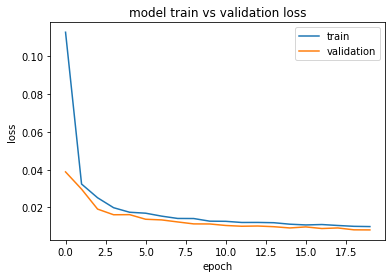

In [188]:
loss = history.history['loss']
epoch = range(len(loss))
# plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [189]:
history.history

{'loss': [0.11285367314866933,
  0.032400449848359804,
  0.02512580931759025,
  0.01985654705317033,
  0.017446591551453276,
  0.016949560995291508,
  0.015389251743626563,
  0.014161248904755817,
  0.014120735935967245,
  0.012723815798096741,
  0.012641877636333522,
  0.012031141241806537,
  0.012054213661590034,
  0.011904750767382328,
  0.011119261810761899,
  0.010721788234566904,
  0.010940017279066808,
  0.01043524399570458,
  0.00998964418739964,
  0.009858315710149043],
 'val_loss': [0.038835948759532835,
  0.029695100947675936,
  0.019121191318494726,
  0.016122799748218203,
  0.01617512609585222,
  0.013736446500273353,
  0.01338864186307393,
  0.012310369669583189,
  0.01127491358398314,
  0.01123805017580828,
  0.010437756731926677,
  0.010031653815005198,
  0.01015368126422526,
  0.009791029235684728,
  0.009127037341605467,
  0.009676862317305732,
  0.0088233905451664,
  0.00912558132535722,
  0.008135172796536642,
  0.008086085891777492]}

In [190]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [123]:
past_weeks = data_training.tail(168)
df= past_weeks.append(data_test, ignore_index = True)
# test.drop(test.tail(len(test)%168).index,inplace=True)
# test = test.drop(['NewDateTime'], axis=1)
df

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,50399.83,50471.19,50797.76,50323.83,1165.14158,2021-12-09 00:00:00,0.998586,-0.001415,0.996332,0.01,19
1,50182.70,50399.84,50483.68,50147.89,871.61111,2021-12-09 01:00:00,0.995692,-0.004317,0.996332,0.01,19
2,49886.02,50182.71,50276.81,49620.62,1628.84987,2021-12-09 02:00:00,0.994088,-0.005930,0.996332,0.01,21
3,49513.35,49886.02,49934.12,49425.74,951.66432,2021-12-09 03:00:00,0.992530,-0.007498,0.996332,0.01,22
4,49816.07,49517.00,49821.01,49420.33,1052.17101,2021-12-09 04:00:00,1.006114,0.006095,0.996332,0.01,22
...,...,...,...,...,...,...,...,...,...,...,...
331,48931.99,48576.02,48950.00,48506.01,799.48215,2021-12-22 19:00:00,1.007328,0.007301,1.001202,0.01,46
332,48974.34,48931.99,49144.99,48860.47,1309.98901,2021-12-22 20:00:00,1.000865,0.000865,1.001202,0.01,47
333,49048.84,48974.33,49139.97,48836.72,894.46650,2021-12-22 21:00:00,1.001521,0.001520,1.001202,0.01,47
334,48977.21,49048.83,49084.45,48788.49,710.47289,2021-12-22 22:00:00,0.998540,-0.001461,1.001202,0.01,46


In [124]:
df = df.drop(['NewDateTime'], axis = 1)
len(df)

336

In [125]:
inputs = scaler.transform(df)
inputs

AttributeError: 'MinMaxScaler' object has no attribute 'scale_'

In [126]:
df2 =df['close'].copy()
pScaler = MinMaxScaler()
pData = pScaler.fit_transform(df2.values.reshape(-1, 1))
pData.shape

(336, 1)

In [127]:
X_test = []
Y_test = []
for i in range(336, inputs.shape[0]+1,24):
    X_test.append(inputs[i-336:i-168])
    Y_test.append(inputs[i-168:i,0])

In [128]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1, 168, 10), (1, 168))

In [129]:
Y_test=pScaler.inverse_transform(Y_test.reshape(168,1))

array([[48079.07968364],
       [48075.97506946],
       [48073.79183253],
       [48050.66343323],
       [48041.33616667],
       [48013.35680772],
       [48059.82228912],
       [48037.56035053],
       [48044.0478226 ],
       [48066.44034048],
       [48090.69879981],
       [48098.03686783],
       [48034.78035403],
       [48073.50748697],
       [48016.13436348],
       [48022.1324683 ],
       [48012.46349892],
       [47960.91030664],
       [47948.62853107],
       [47934.29043676],
       [47942.04220926],
       [47961.5778475 ],
       [47928.83051388],
       [47905.77899771],
       [47924.98269607],
       [47932.13282754],
       [47927.4563804 ],
       [47922.09408689],
       [47940.027383  ],
       [47914.37404394],
       [47879.85473713],
       [47829.49018251],
       [47845.24512315],
       [47856.54450312],
       [47823.10888239],
       [47842.32600479],
       [47833.41732418],
       [47822.50724135],
       [47703.03085108],
       [47771.10537461],


In [130]:
Y_pred = model.predict(X_test)
Y_pred=pScaler.inverse_transform(Y_pred.reshape(168,1))


In [131]:
Y_pred.shape

(168, 1)

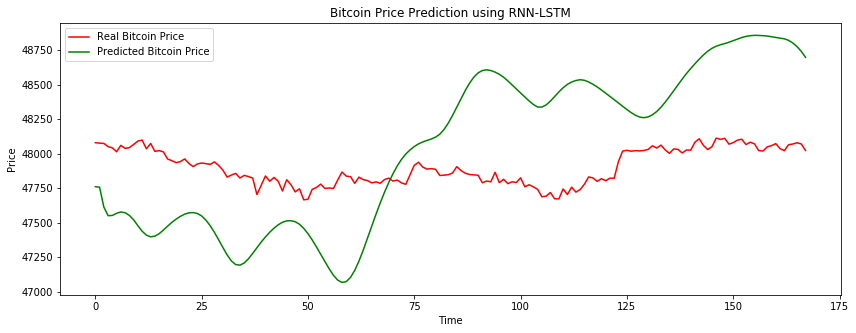

In [132]:
plt.figure(figsize=(14,5))
plt.plot(Y_test[0:,0], color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred[0:,0], color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()